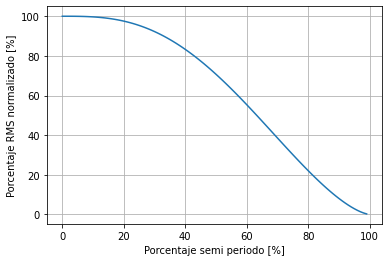

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *

frec, ampl = 1, 1
periode = 1 / frec
rms_unit = (np.sqrt(2) / 2) * ampl

def function(tInt_perc, bias=0):
    frec, ampl = 1, 1
    rms_unit   = (np.sqrt(2) / 2) * ampl
    rms_dimmer = fun_rms_simbolic(tInt_perc, frec=frec, amp=ampl) / rms_unit
    return rms_dimmer - bias

def plot():
    t_perc_serie = np.arange(0, 100, 1)
    vt_serie     = [(function(t) * 100) for t in range(100)]
    plt.plot(t_perc_serie, vt_serie)
    plt.xlabel("Porcentaje semi periodo [%]")
    plt.ylabel("Porcentaje RMS normalizado [%]")
    plt.grid()

plot()

In [2]:
from scipy.optimize import newton, bisect
root = bisect(function, 0, 100, args=(0.10))

# for i in range(100):
#     root = bisect(function, 0, 100.0, args=(i / 100))
#     print("rms({:.4f}%)= {:.2f}%".format(root, function(root) * 100))


print("rms(half_periode * {:.2f}%)= {:.4f}%".
      format(root, function(root) * 100))

rms(half_periode * 88.40%)= 10.0000%


Text(0.5, 0, 'duty [%]')

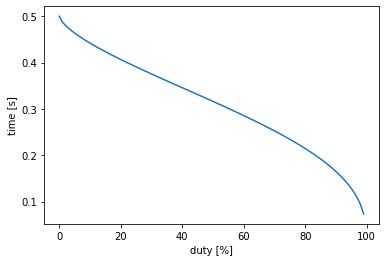

In [3]:
from dimmer import Dimmer
import matplotlib.pyplot as plt
import numpy as np

dimmer = Dimmer(frec=1, amp=1)

duty_series = np.arange(0, 100, 1)
rms_series = [dimmer.solve_tint_for_duty(duty) for duty in duty_series]
plt.plot(duty_series, rms_series)
plt.ylabel("time [s]")
plt.xlabel("duty [%]")